In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from pathlib import Path
from google.colab import drive

In [2]:
def train_and_evaluate_model(hidden_units, X_train, y_train, X_val, y_val):
    model = Sequential([
        Dense(hidden_units, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(10, activation='softmax')  # Assuming 10 classes for classification
    ])

    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=50, batch_size=32, verbose=0)

    return history.history['loss'], history.history['val_loss']


In [3]:
# Main execution block to avoid running unintentionally when imported
def load_data_large():
    """ Load large training and validation dataset

        Returns a tuple of length 4 with the following objects:
        X_train: An N_train-x-M ndarray containing the training data (N_train examples, M features each)
        y_train: An N_train-x-1 ndarray containing the labels
        X_val: An N_val-x-M ndarray containing the training data (N_val examples, M features each)
        y_val: An N_val-x-1 ndarray containing the labels
    """
    # Ensure your path reflects where you've stored the files in your Google Drive
    base_path = Path('/content/drive/MyDrive/Acceleration')
    train_all = np.loadtxt(base_path / 'largeTrain.csv', dtype=int, delimiter=',')
    valid_all = np.loadtxt(base_path / 'largeValidation.csv', dtype=int, delimiter=',')

    X_train = train_all[:, 1:]
    y_train = train_all[:, 0]
    X_val = valid_all[:, 1:]
    y_val = valid_all[:, 0]

    return (X_train, y_train, X_val, y_val)

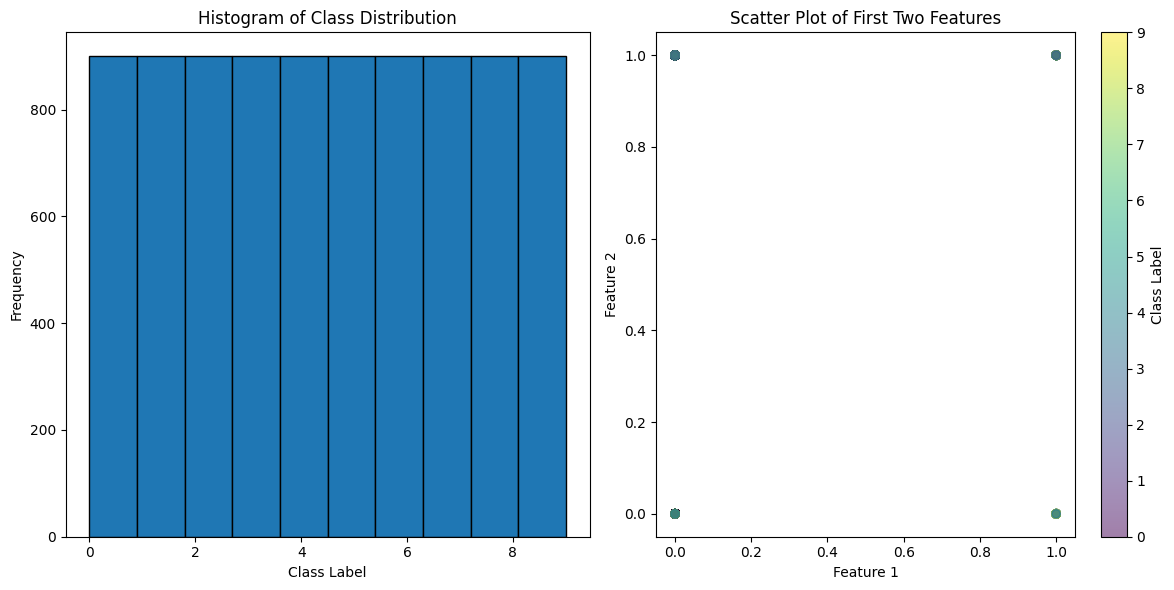

In [4]:
def visualize_data(X_train, y_train):
    """ Visualize data with histograms and scatter plots.

    Parameters:
    X_train (numpy.ndarray): Training data features.
    y_train (numpy.ndarray): Training data labels.
    """
    plt.figure(figsize=(12, 6))

    # Visualizing the distribution of labels
    plt.subplot(1, 2, 1)
    plt.hist(y_train, bins=np.unique(y_train).size, edgecolor='black')
    plt.title('Histogram of Class Distribution')
    plt.xlabel('Class Label')
    plt.ylabel('Frequency')

    # Assuming we're plotting the first two features
    # Check if we have at least two features to plot
    if X_train.shape[1] >= 2:
        plt.subplot(1, 2, 2)
        scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.5)
        plt.colorbar(scatter, label='Class Label')
        plt.title('Scatter Plot of First Two Features')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    else:
        print("Not enough features for a scatter plot.")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Assuming 'load_data_large' and the mounting of Google Drive have been defined and called elsewhere
    X_train, y_train, X_val, y_val = load_data_large()

    # Visualize the data
    visualize_data(X_train, y_train)

In [5]:
if __name__ == "__main__":
    # Mount Google Drive
    drive.mount('/content/drive')

    # Load your data
    X_train, y_train, X_val, y_val = load_data_large()

    # Parameters
    hidden_units_options = [5, 20, 50, 100, 200]

    # Store full history for better visual insight
    histories = []

    for units in hidden_units_options:
        train_loss, val_loss = train_and_evaluate_model(units, X_train, y_train, X_val, y_val)
        histories.append((train_loss, val_loss))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


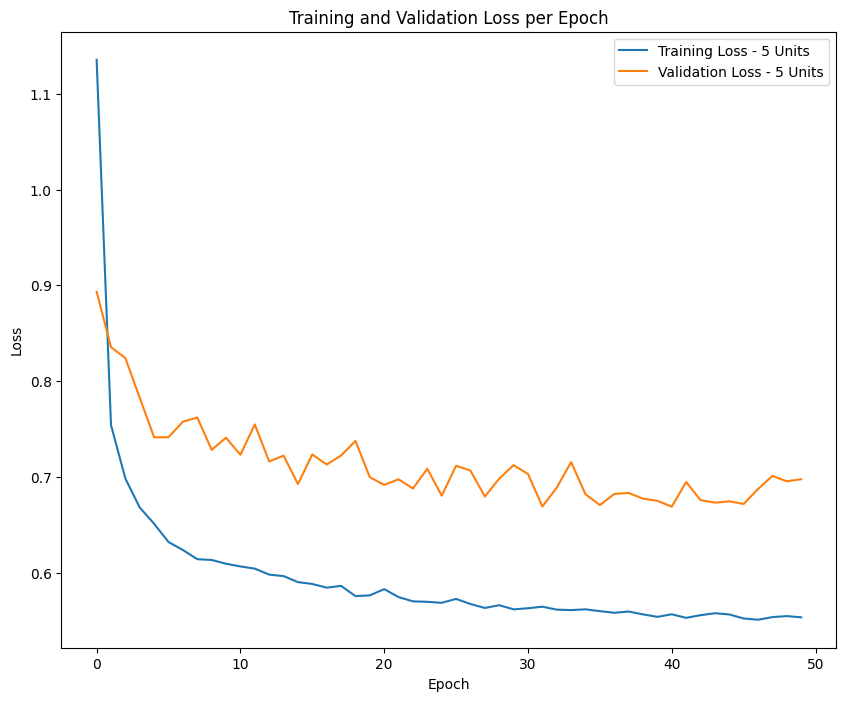

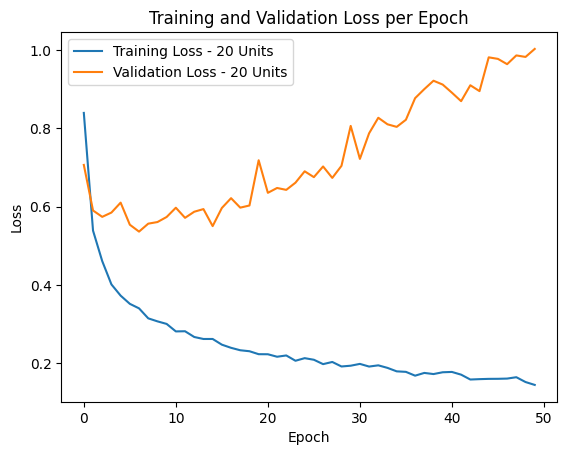

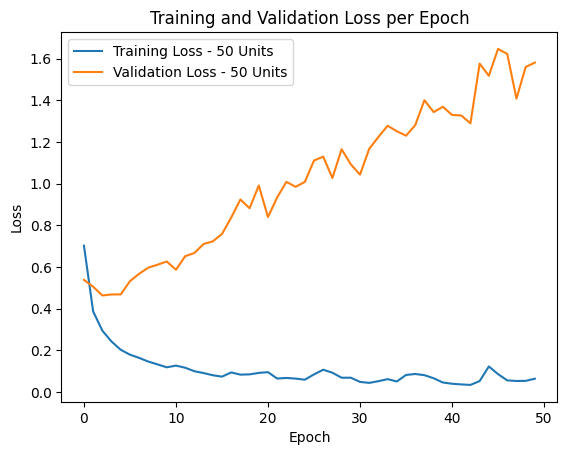

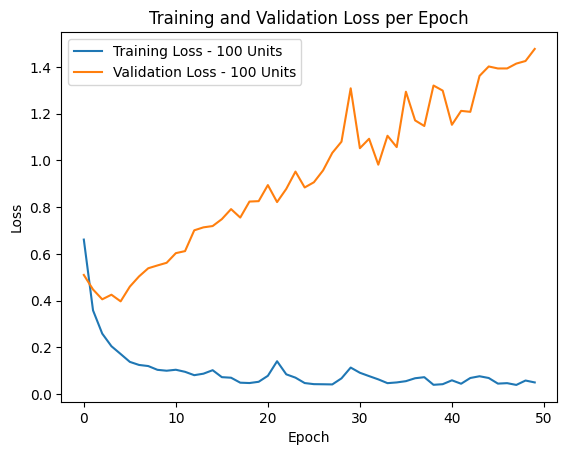

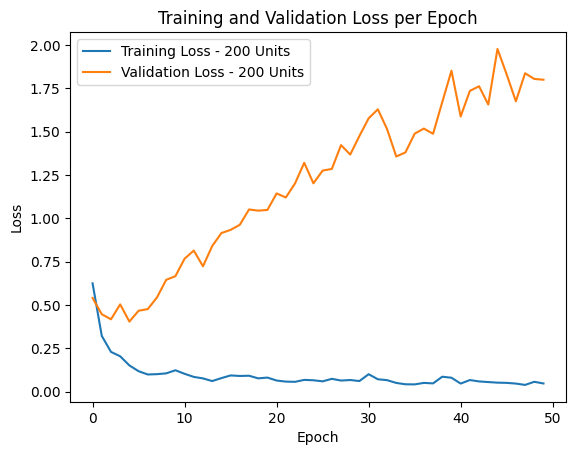

In [18]:
# Plotting
plt.figure(figsize=(10, 8))
for i, (train_loss, val_loss) in enumerate(histories):
  plt.plot(train_loss, label=f'Training Loss - {hidden_units_options[i]} Units')
  plt.plot(val_loss, label=f'Validation Loss - {hidden_units_options[i]} Units')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss per Epoch')
  plt.legend()
  plt.show()